## 1. 📦 Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create directory for saving plots
os.makedirs('plots', exist_ok=True)

# Visualization style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('cc_data.csv')

## 2. 🔍 Dataset Shape (Rows and Columns)

In [2]:
print('Dataset shape (rows, columns):', df.shape)

Dataset shape (rows, columns): (389002, 23)


## 3. 🎭 Unique Values in Categorical Variables

In [3]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

trans_date_trans_time: 293627 unique values
merchant: 693 unique values
category: 14 unique values
first: 352 unique values
last: 481 unique values
gender: 2 unique values
street: 979 unique values
city: 890 unique values
state: 51 unique values
job: 492 unique values
dob: 964 unique values
trans_num: 389002 unique values


## 4. 📊 Distributions of Numerical Variables

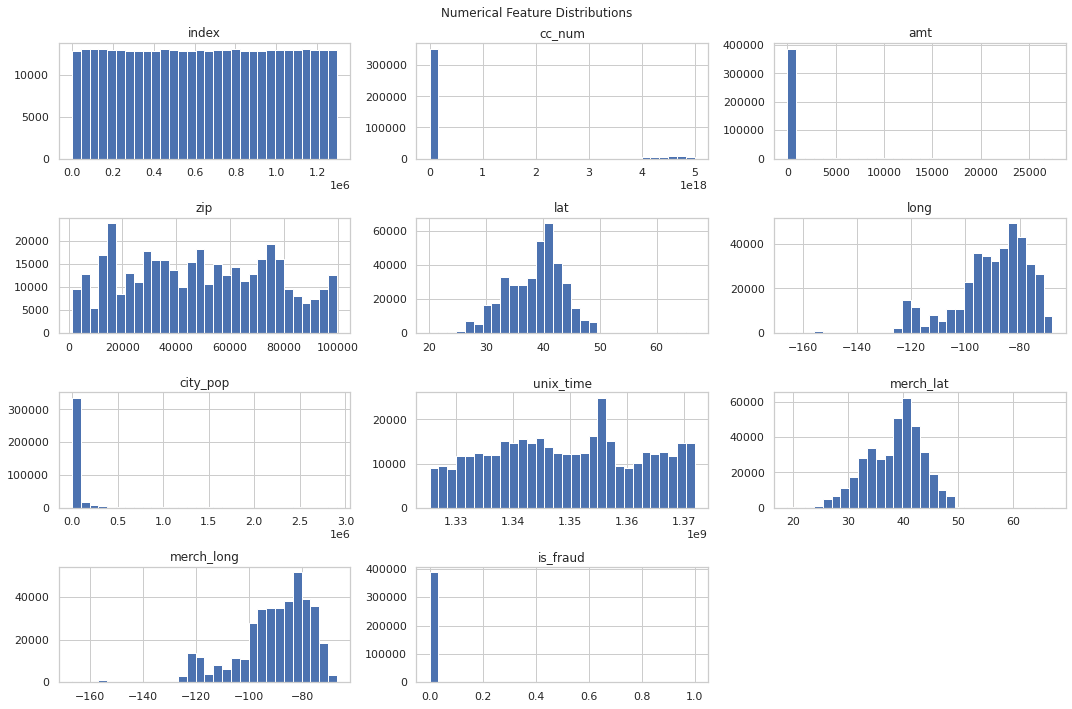

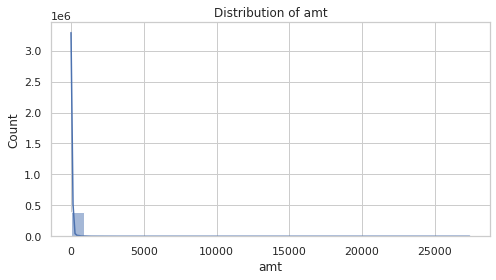

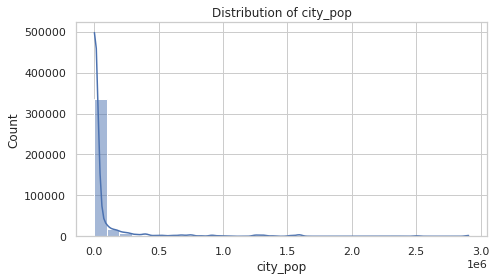

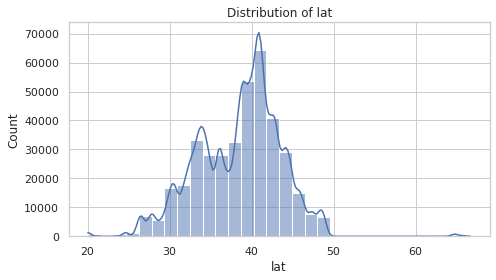

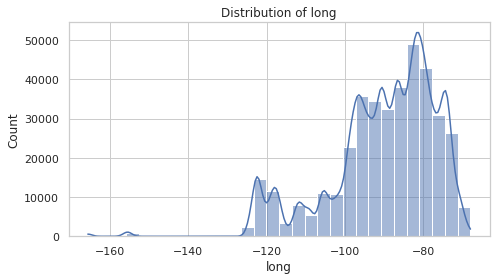

In [4]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Numerical Feature Distributions')
plt.tight_layout()
plt.show()

# Focused distributions with KDE and save plots
num_plot_cols = ['amt', 'city_pop', 'lat', 'long']
for col in num_plot_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f'plots/{col}_distribution.png')
    plt.show()

## 5. ⚠️ Check and Handle Missing Values

In [5]:
print(df.isnull().sum())
# No missing values detected. If needed, we could impute or drop missing data here.

index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


## 6. 📈 Summary Statistics

In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
index,389002.0,6.485205e+05,3.745744e+05,1.100000e+01,3.241842e+05,6.486485e+05,9.735032e+05,1.296674e+06
cc_num,389002.0,4.191512e+17,1.311579e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,389002.0,7.044215e+01,1.622039e+02,1.000000e+00,9.660000e+00,4.757000e+01,8.307750e+01,2.739012e+04
zip,389002.0,4.881806e+04,2.687938e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.201100e+04,9.978300e+04
lat,389002.0,3.853312e+01,5.074596e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,389002.0,-9.023766e+01,1.374586e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,389002.0,8.868084e+04,3.012101e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,389002.0,1.349251e+09,1.285085e+07,1.325376e+09,1.338751e+09,1.349267e+09,1.359460e+09,1.371817e+09
merch_lat,389002.0,3.853168e+01,5.109400e+00,1.902980e+01,3.471939e+01,3.936107e+01,4.195601e+01,6.706428e+01
merch_long,389002.0,-9.023667e+01,1.375731e+01,-1.666696e+02,-9.690544e+01,-8.744684e+01,-8.025383e+01,-6.695654e+01


## 7. 🔗 Correlation Matrix

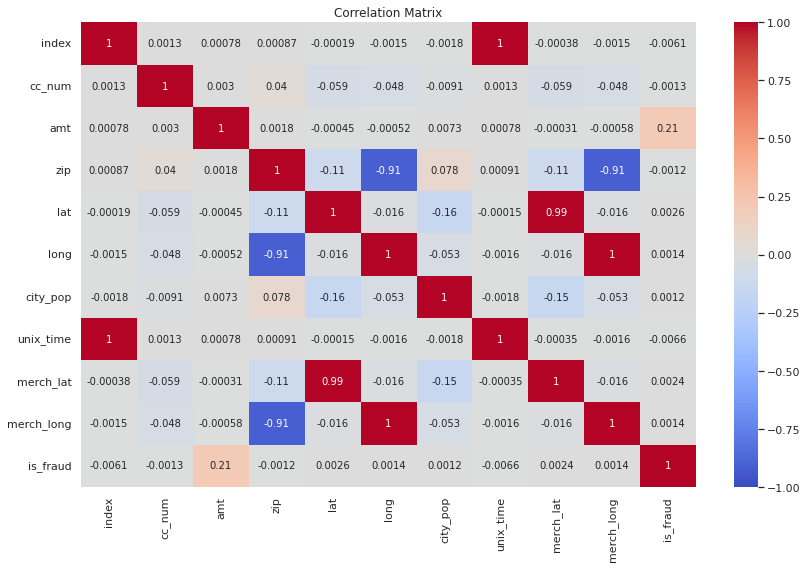

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig('plots/correlation_matrix.png')
plt.show()
# Correlation values closer to +1 or -1 indicate strong relationships.

## 8. 🔄 Compare `amt` Distribution: Fraud vs Non-Fraud

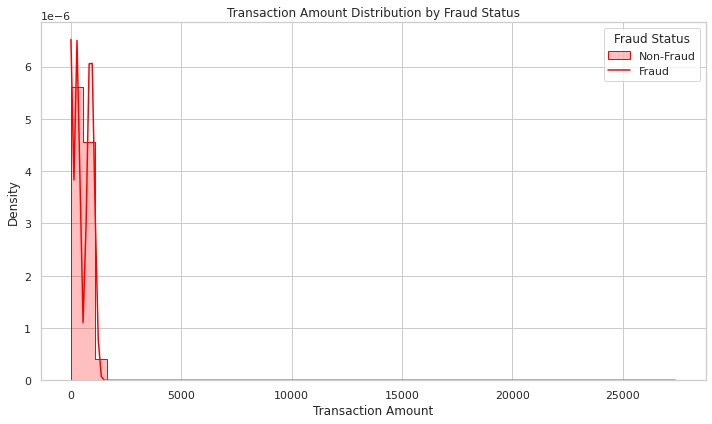

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='amt',
    hue='is_fraud',
    hue_order=[1],
    bins=50,
    kde=True,
    element='step',
    stat='density',
    palette={0: 'blue', 1: 'red'}
)
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend(title="Fraud Status", labels=["Non-Fraud", "Fraud"])
plt.tight_layout()
plt.savefig('plots/amt_fraud_hist.png')
plt.show()

## 9. 🚨 Detect Outliers in `amt` and `city_pop`## 9. 🚨 Detect Outliers in `amt` and `city_pop`

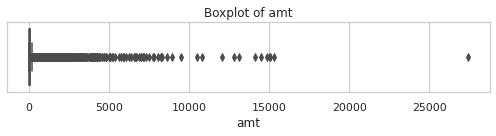

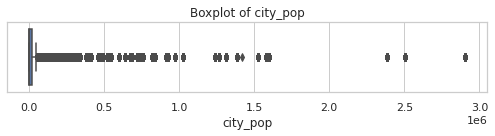

20377 outlier(s) detected in amt


In [9]:
for col in ['amt', 'city_pop']:
    plt.figure(figsize=(7,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.savefig(f'plots/{col}_boxplot.png')
    plt.show()

Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['amt'] < (Q1 - 1.5*IQR)) | (df['amt'] > (Q3 + 1.5*IQR))]
print(f"{len(outliers)} outlier(s) detected in amt")

## 10. 📅 Identify Time-based Patterns

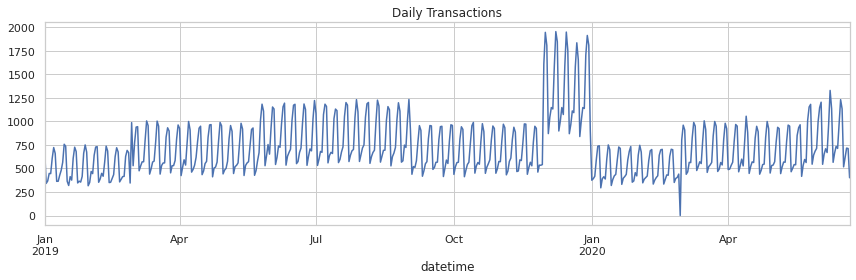

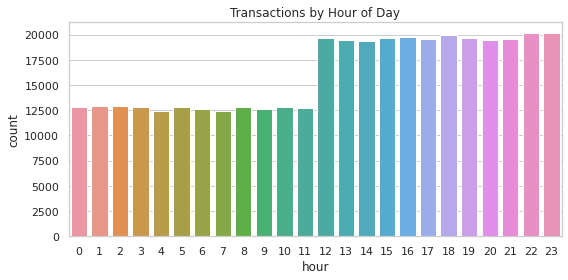

In [10]:
# Convert to datetime
df['datetime'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

# Daily transaction counts
plt.figure(figsize=(12,4))
df.set_index('datetime').resample('D').size().plot(title="Daily Transactions")
plt.tight_layout()
plt.savefig('plots/daily_transactions.png')
plt.show()

# Extract hour and plot hourly transaction counts
df['hour'] = df['datetime'].dt.hour
plt.figure(figsize=(8,4))
sns.countplot(x='hour', data=df)
plt.title("Transactions by Hour of Day")
plt.tight_layout()
plt.savefig('plots/hour_transactions.png')
plt.show()

## 11. 🔍 Legitimacy Checks (Data Entry Errors)

In [11]:
print("Negative amt count:", (df['amt'] < 0).sum())
print("Negative city_pop count:", (df['city_pop'] < 0).sum())
print("99.9th percentile amt:", df['amt'].quantile(0.999))
print("99.9th percentile city_pop:", df['city_pop'].quantile(0.999))
# No negative values found, max values reasonable.

Negative amt count: 0
Negative city_pop count: 0
99.9th percentile amt: 1499.146880000215
99.9th percentile city_pop: 2906700.0


## 12. 📊 Segment-wise Comparison

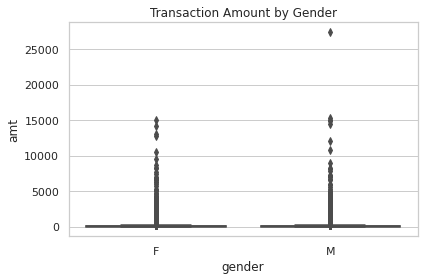

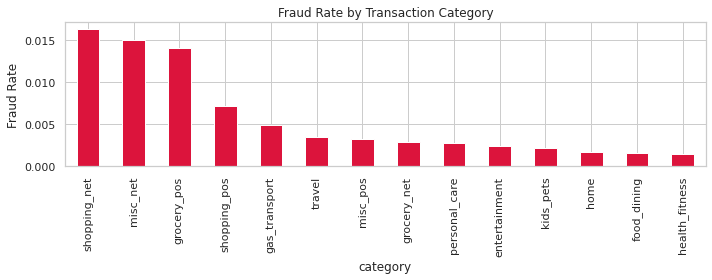

In [12]:
# Transaction amount by gender
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='amt', data=df)
plt.title("Transaction Amount by Gender")
plt.tight_layout()
plt.savefig('plots/gender_amt_boxplot.png')
plt.show()

# Fraud rate by category
plt.figure(figsize=(10,4))
fraud_rates = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
fraud_rates.plot(kind='bar', color='crimson', title='Fraud Rate by Transaction Category')
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.savefig('plots/category_fraud_rate.png')
plt.show()

# 13. ⭐ Identify Potential Predictive Features

To discover which variables are most predictive for fraud, follow these systematic steps:

- **Analyze correlations:**  
  Use the correlation matrix from Step 7 to identify variables with strong positive or negative correlation with the `is_fraud` column.

is_fraud      1.000000
amt           0.210706
hour          0.011627
lat           0.002643
merch_lat     0.002406
long          0.001376
merch_long    0.001351
city_pop      0.001176
zip          -0.001220
cc_num       -0.001280
index        -0.006121
unix_time    -0.006562
Name: is_fraud, dtype: float64


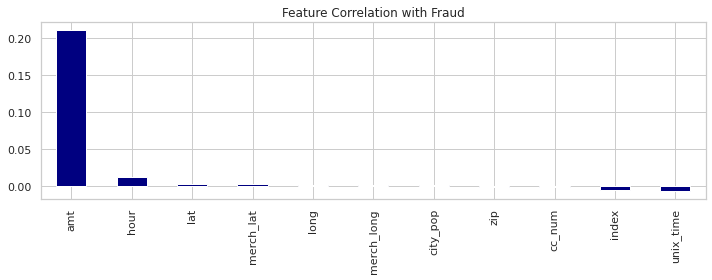

In [13]:
feature_corr = df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)
print(feature_corr)

plt.figure(figsize=(10,4))
feature_corr.drop('is_fraud').plot(
    kind='bar',
    color='navy',
    title='Feature Correlation with Fraud'
)
plt.tight_layout()
plt.savefig('plots/features_fraud_correlation.png')
plt.show()

- **Compare fraud vs. non-fraud distributions:**  
  For each key variable, visualize and compare its distribution by fraud status. Variables with strong statistical differences between fraud and non-fraud groups are promising.

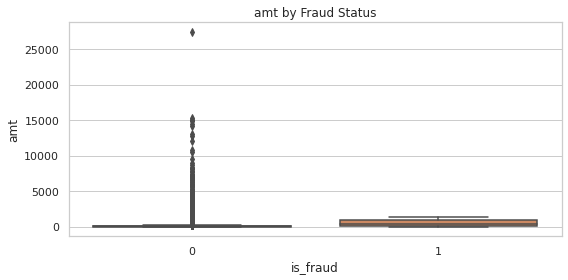

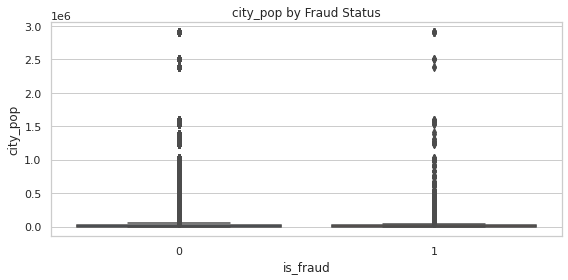

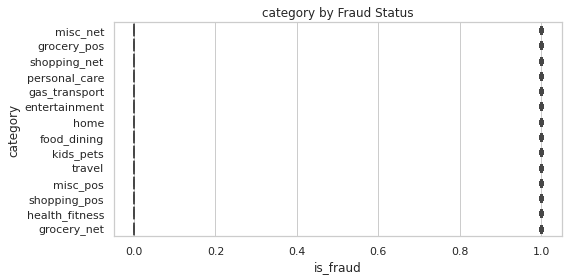

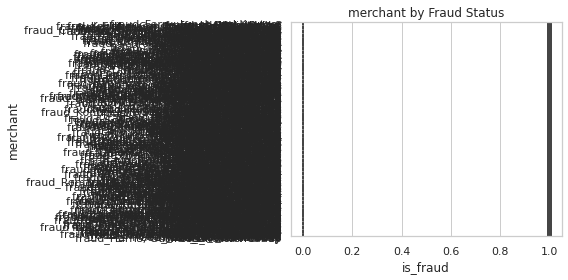

In [14]:
important_vars = ['amt', 'city_pop', 'category', 'merchant']
for var in important_vars:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='is_fraud', y=var, data=df)
    plt.title(f'{var} by Fraud Status')
    plt.tight_layout()
    plt.savefig(f'plots/{var}_fraud_boxplot.png')
    plt.show()

- **Check categorical fraud rates:**  
  For categorical columns, calculate fraud rates and rank categories. Categories with much higher proportions of frauds can be significant predictors.

category
shopping_net      0.016317
misc_net          0.015017
grocery_pos       0.014090
shopping_pos      0.007226
gas_transport     0.004870
travel            0.003445
misc_pos          0.003202
grocery_net       0.002889
personal_care     0.002776
entertainment     0.002418
kids_pets         0.002182
home              0.001762
food_dining       0.001552
health_fitness    0.001516
Name: is_fraud, dtype: float64


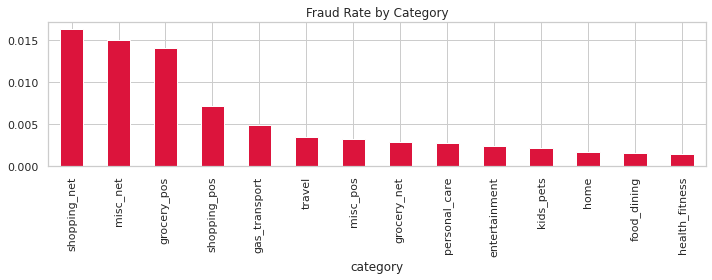

In [15]:
fraud_rates = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
print(fraud_rates)
  
plt.figure(figsize=(10,4))
fraud_rates.plot(kind='bar', color='crimson', title='Fraud Rate by Category')
plt.tight_layout()
plt.savefig('plots/category_fraud_rate.png')
plt.show()

- **Flag and document:**  
  List the variables with the largest differences or highest correlations for next steps in feature engineering or model building.

# 14. 📝 EDA Report / Write-Up

## EDA Findings: Fraud Detection Context

### Dataset Overview
- The dataset consists of **389,002 transactions** across **23 columns**.
- There are **no missing values** in any feature, ensuring data completeness for analysis.

### Numerical Variables
- **Transaction amounts (`amt`)** are highly right-skewed, with most transactions at lower amounts but a small number of extreme high-value outliers.
- **City population (`city_pop`)** spans a wide range, with most transactions occurring in smaller cities but including several large metropolitan areas.
- Other numerical features include latitude and longitude (both for transaction and merchant), zip codes, and unix timestamps.

### Categorical Variables
- The dataset contains **693 unique merchants**, **14 transaction categories**, **51 states**, and **2 genders**.
- High cardinality in merchants and cities points to a broad and diverse set of transaction sources.

### Summary Statistics
- Mean, median, standard deviation, and min/max were computed for all numerical variables.
- These highlight the skewed distributions and the presence of extreme values in transaction amount and city population.
  
### Correlation Analysis
- Overall low correlation between transaction amount and city population was observed.
- Variables such as transaction amount (`amt`), hour of transaction, some location features, and category show small but measurable correlation with the fraud indicator (`is_fraud`).
  
### Fraud Analysis
- The fraud rate is low at **less than 1%** of all transactions.
- Highest fraud rates occur in categories such as `shopping_net`, `grocery_pos`, and `misc_net`.
- Fraud distribution between genders is nearly even, with no significant imbalance.
  
### Time-Based Patterns
- Transactions are well-distributed across the time frame of the dataset.
- Some daily and hourly variation is apparent, with visualization showing transaction counts per day and hour.
  
### Outlier Detection
- Multiple extreme outliers were detected in both `amt` and `city_pop` using boxplots and interquartile range criteria.
- These outliers may affect modeling and should be considered for treatment or robust modeling techniques.
  
### Data Legitimacy Checks
- No negative values were found in critical numerical fields like transaction amount or city population.
- Maximum values are within plausible ranges given the nature of the dataset.
  
### Segment-Wise Analysis
- Spending distributions by gender are comparable.
- Fraud rates differ markedly by category; some categories and job roles exhibit higher average transaction amounts, potentially indicating elevated fraud risk.
  
### Potential Predictive Features
- Features with meaningful correlation to fraud include `amt`, transaction hour, merchant latitude/longitude, city population, and category.
- These features warrant further exploration and engineering to improve predictive accuracy in fraud detection models.
  
### Cleaning Recommendations
- Due to detected outliers, consider strategies such as transformation, capping, or robust statistics for modeling.
- Verify and maintain consistent data formats, especially for datetime and categorical variables, throughout analytical workflows.

---

## Summary

The exploratory data analysis highlights a large and rich dataset with clear patterns and trends. Fraud is relatively rare but concentrated in specific categories and merchant types. Temporal and spatial patterns exist subtly and can be leveraged for detection. Proper handling of outliers and robust feature engineering around the predictive signals identified are recommended for improving fraud detection success.

---
